In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics      import r2_score

In [3]:
data = pd.read_csv("C:/Users/DELL/Desktop/Datascience Course/Projects and assignments/Multi Linear Regression/ToyotaCorolla.csv",encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data.dtypes


Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [48]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
data.shape

(1436, 38)

In [7]:
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [9]:
data.Model.nunique()

372

In [10]:
data.Color.nunique()

10

In [11]:
data.Fuel_Type.nunique()

3

In [21]:
processed_data = data.drop(['Model','Color'], axis = 1)
processed_data.head(2)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,Diesel,90,1,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,Diesel,90,1,0,...,1,0,1,0,0,0,1,0,0,0


In [25]:
Modified_data = processed_data.iloc[:,[1,2,3,4,5,6,8]]
Modified_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,Met_Color
0,13500,23,10,2002,46986,Diesel,1
1,13750,23,10,2002,72937,Diesel,1
2,13950,24,9,2002,41711,Diesel,1
3,14950,26,7,2002,48000,Diesel,0
4,13750,30,3,2002,38500,Diesel,0
...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,1
1432,10845,72,9,1998,19000,Petrol,0
1433,8500,71,10,1998,17016,Petrol,0
1434,7250,70,11,1998,16916,Petrol,1


<AxesSubplot:>

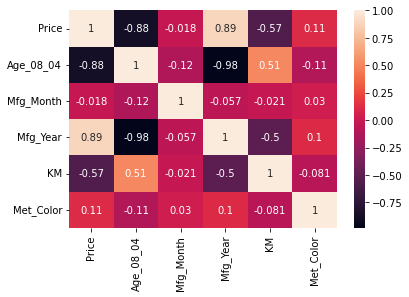

In [26]:
sns.heatmap(Modified_data.corr(), annot= True)

<AxesSubplot:xlabel='Mfg_Year', ylabel='Price'>

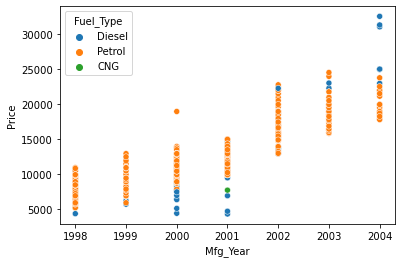

In [27]:
sns.scatterplot(x = 'Mfg_Year', y ='Price', hue = 'Fuel_Type' , data = Modified_data)

<AxesSubplot:xlabel='Mfg_Year', ylabel='Price'>

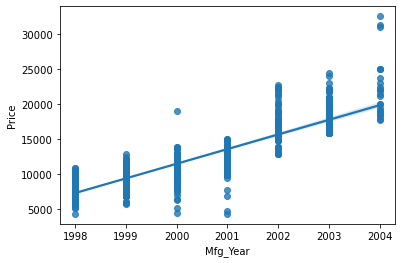

In [55]:
sns.regplot(x='Mfg_Year', y = 'Price', data = Modified_data)

In [28]:
### Dividing Training data into two parts - train and test data
train,test = train_test_split(Modified_data,test_size = 0.3)


In [29]:
train.shape,test.shape

((1005, 7), (431, 7))

In [39]:
X_train = train.drop(['Price','Fuel_Type'],axis=1)
y_train = train['Price']


In [40]:
X_test = test.drop(['Price','Fuel_Type'],axis=1)
y_test = test['Price']

In [41]:
X_train.shape,y_train.shape

((1005, 5), (1005,))

In [42]:
X_test.shape,y_test.shape

((431, 5), (431,))

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model_train = model.fit(X_train,y_train)
print("Model Training is completed")
acc = model_train.score(X_train,y_train)
print("The accuracy of the model training is ",round(acc,2))

Model Training is completed
The accuracy of the model training is  0.82


In [47]:
### Prediction Price based on 
pred = model_train.predict(X_test)
pred

array([13858.93711405,  9118.51900083, 18638.77536641, 16129.27861511,
        7412.69617361,  9660.79652627, 11511.30846116,  6647.62353021,
       18101.03940574, 10122.80306282,  9260.06207515, 11766.67502226,
       11484.28445696,  9637.34474151, 16330.47145622, 11298.87187662,
        9847.48446633,  9678.76523544,  9974.04294027, 13597.55859432,
        9611.3100822 ,  9643.81049319, 15892.1875396 , 12011.15531811,
        7874.72595239, 11891.2222913 , 16023.01868035, 18638.77536641,
       10947.48495965,  7691.80531005,  6877.79456171, 12083.39632206,
       13866.8030336 ,  7165.70792997, 11743.40854358, 11871.41209265,
       11736.52799936, 11812.1733323 ,  7120.36501498,  6988.13154158,
        7324.13465628, 11470.64926356, 13096.07732747, 13591.53042227,
        8141.73104993, 13781.23215457,  9476.19631901, 12105.20660378,
        9790.81506636,  8032.04433516,  9852.70490174,  7357.44091084,
       12187.98795302, 11632.66812057, 11973.46530116,  9607.2869014 ,
      

In [49]:
residuals_data = pd.DataFrame({'Actual Price': y_test, 'Predict Price': pred, 'Error': (y_test -pred)})
residuals_data

,Actual Price,Predict Price,Error
243,13500,13858.937114,-358.937114
697,9250,9118.519001,131.480999
169,17795,18638.775366,-843.775366
31,15750,16129.278615,-379.278615
1253,6950,7412.696174,-462.696174
...,...,...,...
590,10950,12279.426789,-1329.426789
1014,10450,10057.223991,392.776009
797,8950,9337.844097,-387.844097
1145,6450,7167.937500,-717.937500


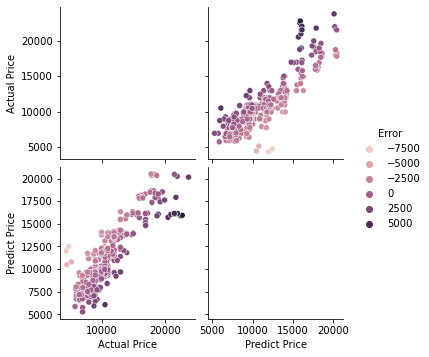

In [50]:
sns.pairplot(residuals_data, hue = 'Error')

<AxesSubplot:xlabel='Actual Price', ylabel='Predict Price'>

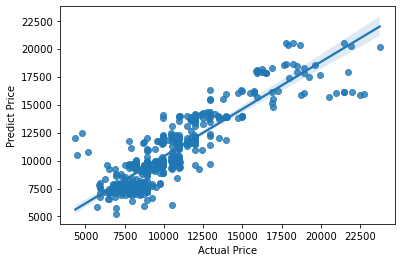

In [52]:
sns.regplot(x='Actual Price', y = 'Predict Price', data = residuals_data)